In [1]:
import nibabel as nib
import scipy.linalg as la
import pandas as pd
from glob import glob
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
import seaborn as sns

In [3]:
import nilearn.plotting

In [4]:
!ls ../outputs/datapaper/tsnr/

figures       sub-sid000020 sub-sid000034 sub-sid000134 sub-sid000535
sub-sid000005 sub-sid000021 sub-sid000050 sub-sid000142 sub-sid000560
sub-sid000007 sub-sid000024 sub-sid000052 sub-sid000278
sub-sid000009 sub-sid000025 sub-sid000055 sub-sid000416
sub-sid000010 sub-sid000029 sub-sid000114 sub-sid000499
sub-sid000013 sub-sid000030 sub-sid000120 sub-sid000522


In [5]:
subjects = [path.split('/')[-1] for path in glob('../outputs/datapaper/tsnr/sub-*')]
subjects = sorted(subjects)

In [6]:
tsnr_fns = sorted(glob(f'../outputs/datapaper/tsnr/sub-*/*median*.nii.gz'))

In [7]:
def make_conjuction_mask(subject):
    mask_fns = glob(f'../outputs/fmriprep/{subject}/func/*space-T1w_desc-brain_mask.nii.gz')
    brainmask = 1.
    for mask_fn in mask_fns:
        bm = nib.load(mask_fn).get_fdata()
        brainmask *= bm
    return brainmask.astype(bool)

In [8]:
tsnr_template_filename = '../outputs/datapaper/tsnr/{subject}/{subject}_task-movie_run-median_space-T1w_desc-tsnr.nii.gz'
tsnr_subject = []
for subject in subjects:
    tsnr = nib.load(tsnr_template_filename.format(subject=subject)).get_fdata()
    mask_subject = make_conjuction_mask(subject)
    tsnr_subject.append(tsnr[mask_subject])

In [9]:
# sort subjects according to median tsnr
subject_ordering = np.argsort([np.median(t) for t in tsnr_subject])

In [10]:
OUTDIR = '../outputs/datapaper/tsnr/figures'

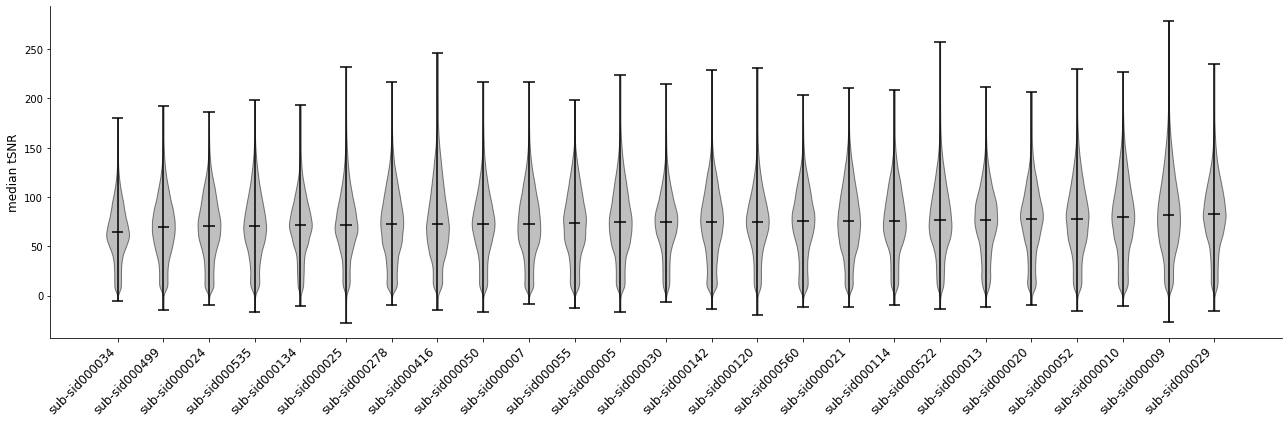

In [11]:
fig, ax = plt.subplots(1, 1, figsize=(18, 6))
pos = np.arange(len(subject_ordering))
tsnr_subject_ordered = [tsnr_subject[i] for i in subject_ordering]
parts = ax.violinplot(tsnr_subject_ordered, positions=pos, showmedians=True);
for pc in parts['bodies']:
    pc.set_facecolor('gray')
    pc.set_edgecolor('black')
    pc.set_alpha(0.5)

for p in ['cbars', 'cmins', 'cmaxes', 'cmedians']:
    parts[p].set_edgecolor('black')

ax.set_xticks(pos)
ax.set_xticklabels([subjects[i] for i in subject_ordering], fontsize=12, rotation=45, ha='right')
ax.set_ylabel('median tSNR', fontsize=12)
sns.despine()
plt.tight_layout()
fig.savefig(f"{OUTDIR}/group_median-tsnr.png", dpi=300, bbox_inches='tight')

In [12]:
mean_tsnr_for_each_subject = [np.mean(t) for t in tsnr_subject]
mean_across_subjects = np.mean(mean_tsnr_for_each_subject)
std_across_subjects = np.std(mean_tsnr_for_each_subject)

print(f"Mean tSNR is {mean_across_subjects:.2f} ± {std_across_subjects:.2f}")

Mean tSNR is 74.42 ± 3.91
